In [1]:
#clear all varaibles
%reset

In [2]:
#Let's import math things
import numpy as np
from scipy import stats
# Import curve fitting package from scipy
from scipy.optimize import curve_fit
# Plotting
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
#Show progress
from tqdm.notebook import tqdm_notebook
#Random numbers
import random
# Multiprocessing
import multiprocessing as mp
import time

#from fbm import fbm, fgn
# from matplotlib import rc
#import colorama

plt.style.use('ggplot')  # Set plot style

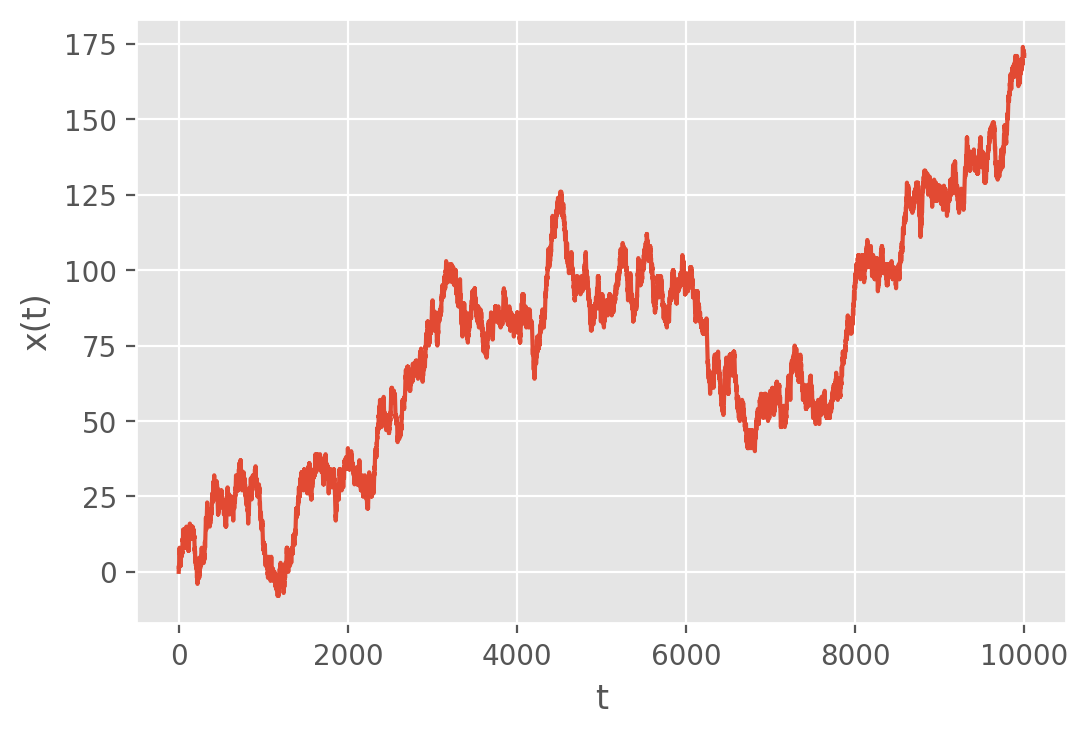

In [5]:
#allows you to use previously made functions for analysis
#%%capture

%run Diffusion-Entropy-Analysis/dea.ipynb

%run Analysis_Functions.ipynb

outerloop:   0%|          | 0/3 [00:00<?, ?it/s]

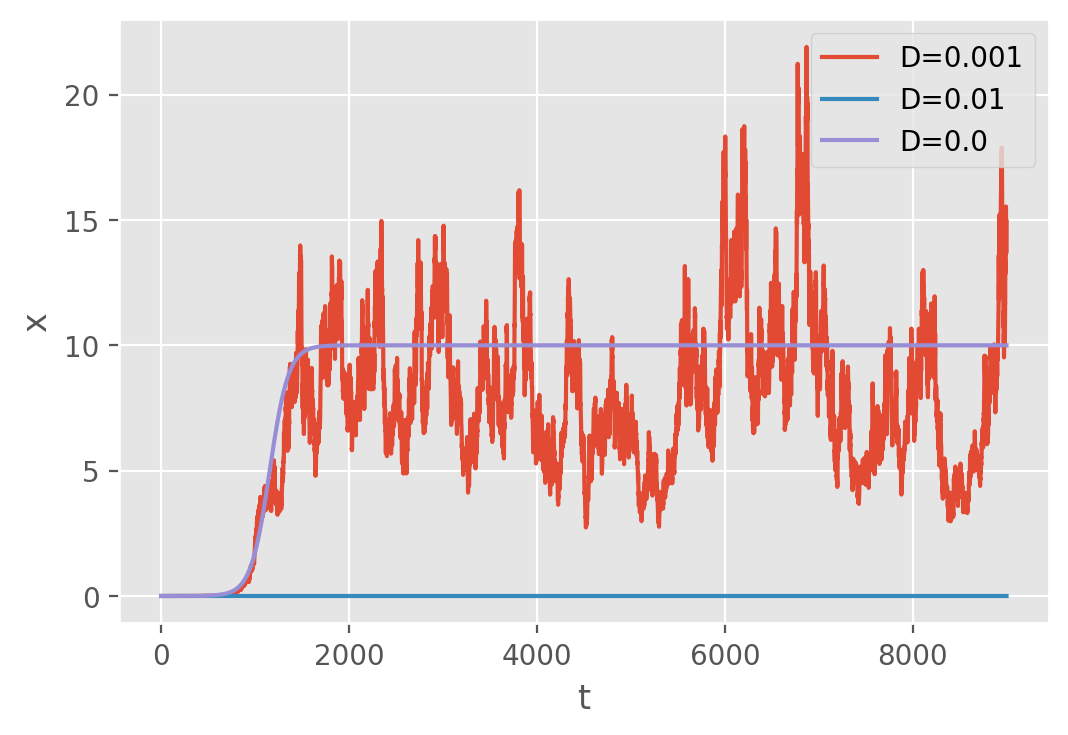

In [6]:
# First we will consider drawing may trajectories with the random walk function.

D = np.array([0.001,0.01, 0])

start = 0.0001
L = 9000

#x_trajs = np.zeros([len(D),L])

a = 0.01
b = 0.001
alpha = 0
lamb = 0
renew = True
plot = False

for q in tqdm_notebook(range(len(D)), desc='outerloop'):
    plt.plot(logistic_x(start,L,a,b,D[q],alpha,lamb,renew,plot), label = 'D='+str(D[q]))
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='upper right')
plt.show()

In [7]:
#start = 0.001
start = 10
L = 10**7
a = 0.01
b = 0.001
D = 0.0001
alpha = 0
lamb = 0
renew = True
plot = False

number_traj = 1

x_matrix = np.zeros([number_traj,L])

t0 = time.time()

x = logistic_x(start,L,a,b,D,alpha,lamb,renew,plot)
if np.any(x<0) == True:
    print('Negative value detected in '+ str(i) +' trajectory.')


In [145]:
np.shape(x)

(10000000,)

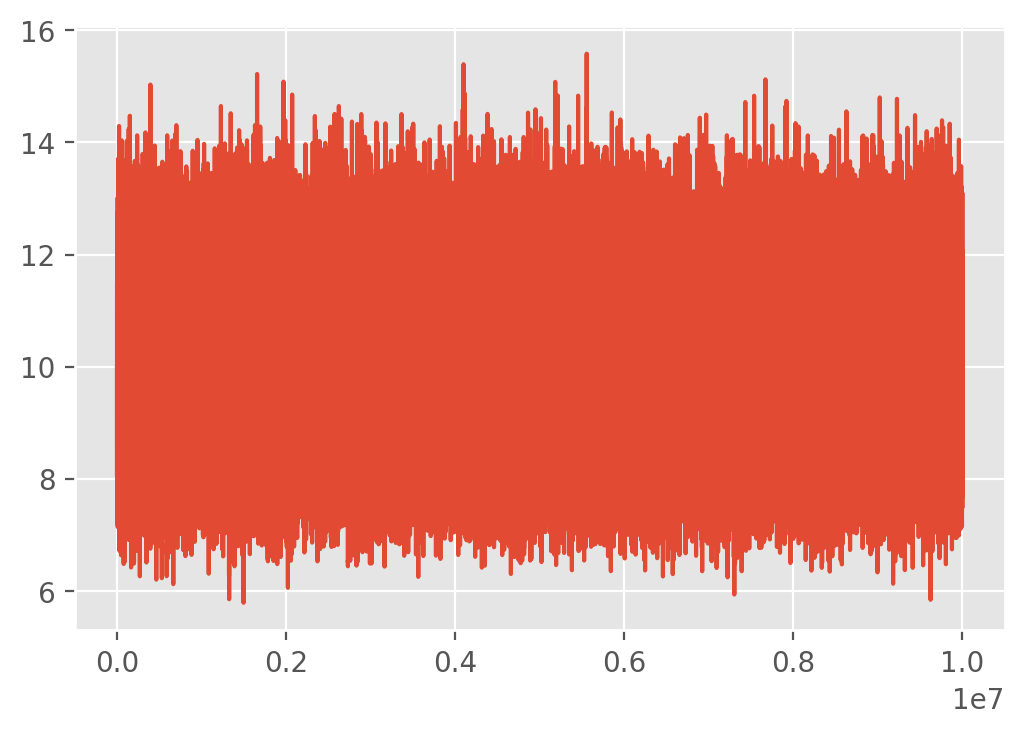

In [141]:
_=plt.plot(x)

In [149]:
number_of_points = 100 #may not repeat
data = x

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 93/93 [00:59<00:00,  1.55it/s]


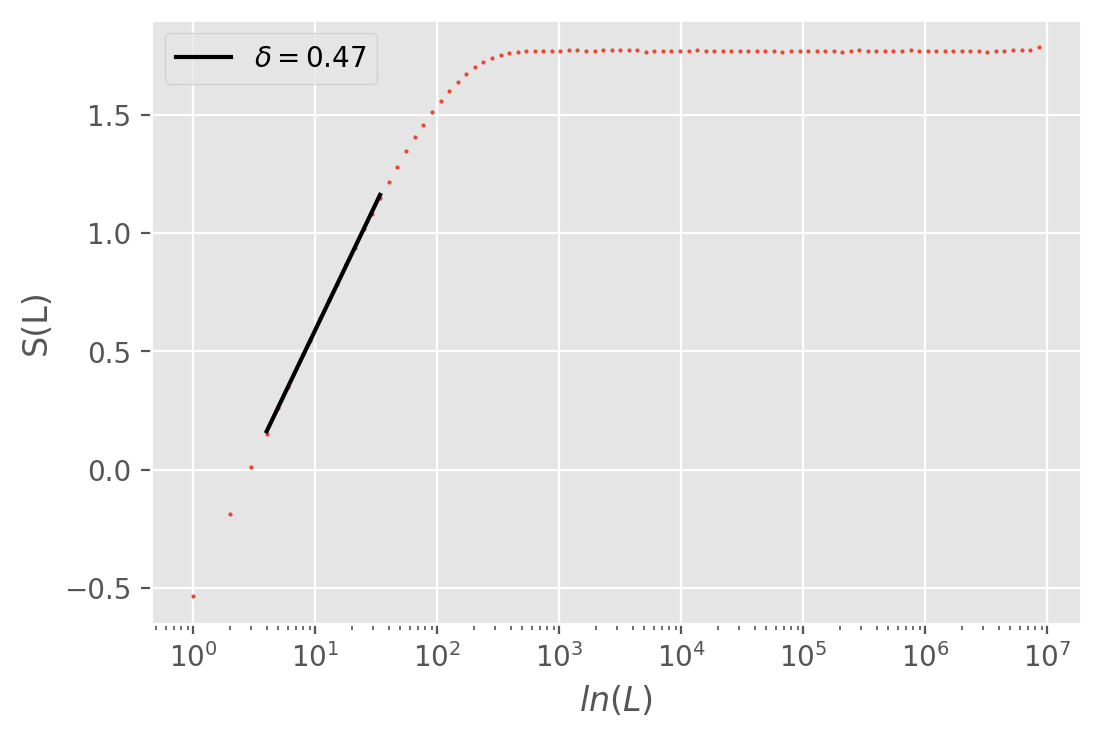

In [150]:
#for fitting and to get the scaling
start = 4*10**0
stop = 4*10**1
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [166]:
#start = 0.001
start = 10
L = 10**5
a = 0.01
b = 0.001
D = 0.0001
alpha = 0
lamb = 0
renew = True
plot = False

number_traj = 9000

x_matrix = np.zeros([number_traj,L])

t0 = time.time()

for i in tqdm_notebook(range(number_traj), desc='outer_loop'):
    x_matrix[i] = logistic_x(start,L,a,b,D,alpha,lamb,renew,plot)
    if np.any(x_matrix[i]<0) == True:
        print('Negative value detected in '+ str(i) +' trajectory.')
        
t1 = time.time()
print(f'Execution time {t1 - t0} s')

outer_loop:   0%|          | 0/9000 [00:00<?, ?it/s]

Execution time 3819.312075853348 s


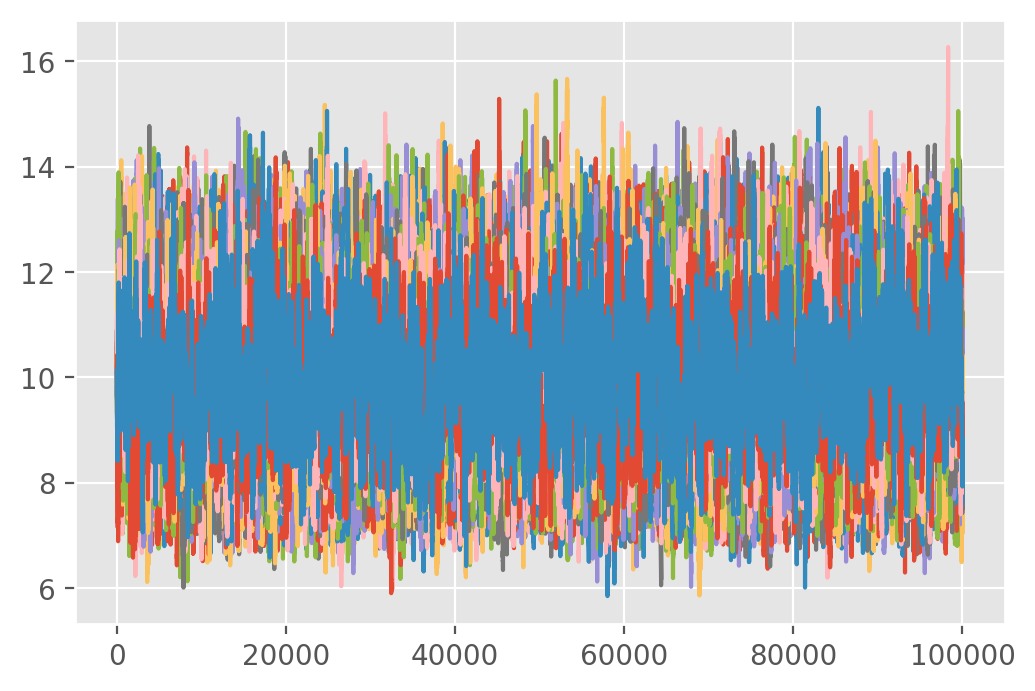

In [152]:
_=plt.plot(x_matrix.T)

In [164]:
number_of_points = 100 #may not repeat
data = x_matrix

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 75/75 [00:00<00:00, 1531.08it/s]


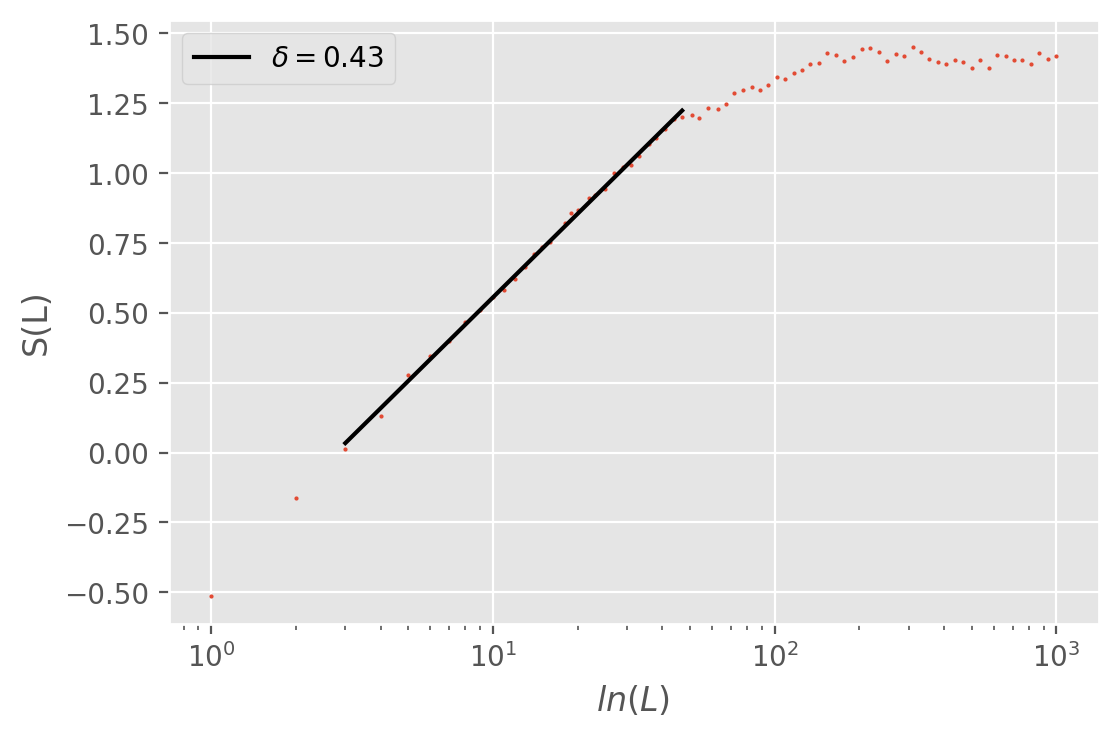

In [165]:
#for fitting and to get the scaling
start = 3*10**0
stop = 5*10**1
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)